In [1]:
# import the necessary libraries

import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

## Importing the file

In [53]:
walmart = pd.read_csv("Walmart_sales.csv")

## Exploratory Data Analysis

In [38]:
walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [39]:
walmart.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [40]:
# finding the shape of the dataset
# describing the values of the dataset

print(walmart.shape) 
print(walmart.describe())

(6435, 8)
             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14

In [41]:
# finding the infornmation
walmart.info

<bound method DataFrame.info of       Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

       

In [42]:
# checking for null values

walmart.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

* There are no null values in the dataset.

In [43]:
#finding out the unique values
walmart.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

In [44]:
walmart.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [45]:
walmart.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [46]:
# See rows with missing values
walmart[walmart.isnull().any(axis=1)]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


* There are no rows with missing values

In [47]:
# Finding out the correlation between the features
corr = walmart.corr()
corr.shape

(7, 7)

<AxesSubplot:>

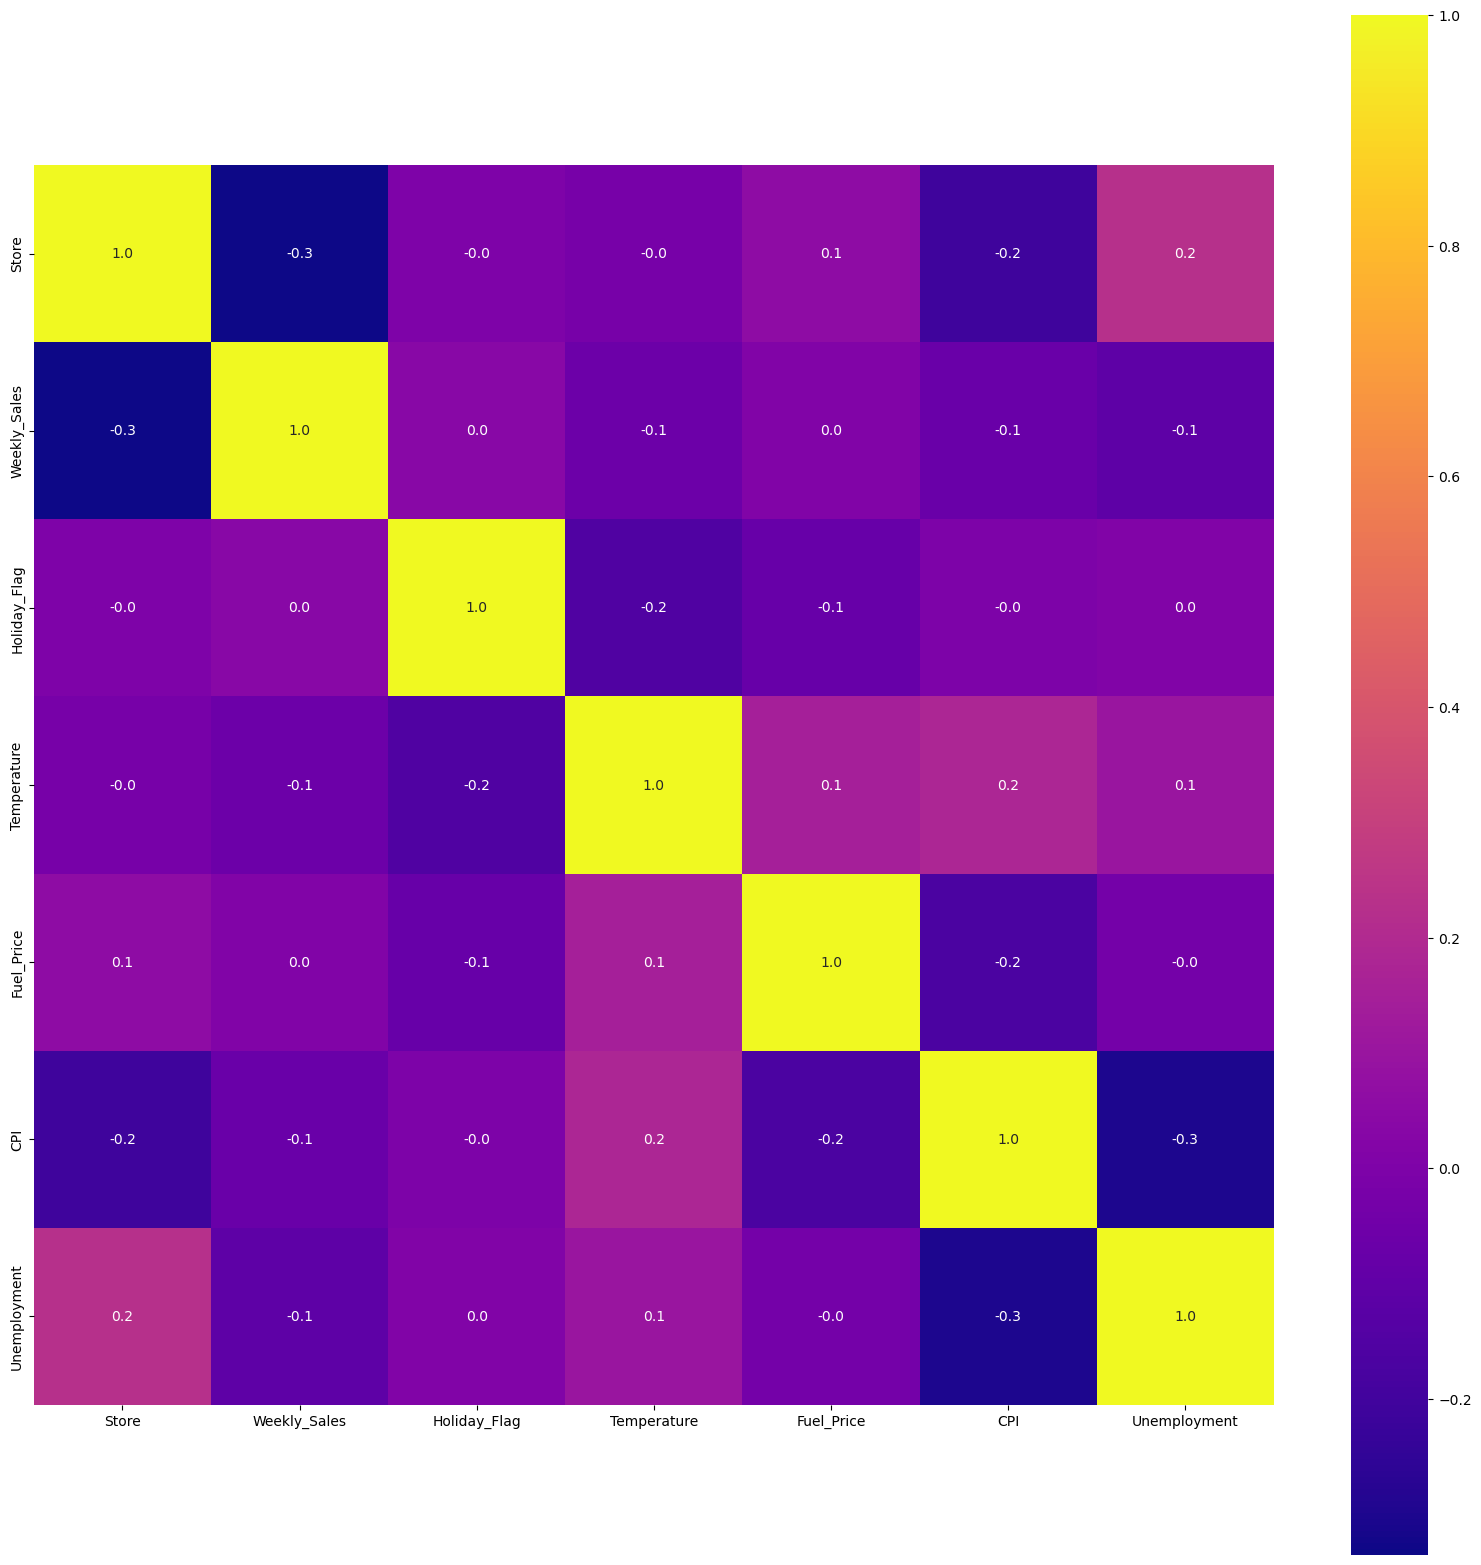

In [48]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True,  cmap='plasma')

* There are no major correlation between feautures, there exists slight correlation between them.

# Building the Model

In [49]:
# Spliting target variable and independent variables
X = walmart.drop(['Weekly_Sales'], axis = 1)
y = walmart['Weekly_Sales']

### Label Encoding the Categorical Feautures

In [55]:
# encode categorical
X = pd.get_dummies(X)

In [70]:
X.head(3)

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Date_01-04-2011,Date_01-06-2012,Date_01-07-2011,Date_01-10-2010,...,Date_29-06-2012,Date_29-07-2011,Date_29-10-2010,Date_30-03-2012,Date_30-04-2010,Date_30-07-2010,Date_30-09-2011,Date_30-12-2011,Date_31-08-2012,Date_31-12-2010
0,1,0,42.31,2.572,211.096358,8.106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,38.51,2.548,211.242170,8.106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,39.93,2.514,211.289143,8.106,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

In [57]:
print(X.shape,y.shape)

(6435, 149) (6435,)


## Fitting the Model using Decision Tree Regressor

In [60]:
#fit the model
# Instantiate a DecisionTreeRegressor model with specified hyperparameters

reg=DecisionTreeRegressor(criterion='squared_error', max_depth=8,random_state=200)

# Fit the DecisionTreeRegressor model to the training data
reg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8, random_state=200)

## Feature Importance

In [61]:
# # Access the feature importances calculated by the trained decision tree model
reg.feature_importances_

array([7.22538229e-01, 1.85225263e-06, 6.40209353e-04, 3.85711918e-04,
       1.57241937e-01, 8.08813761e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.48011249e-06,
       1.65433741e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.34985159e-07, 6.37340672e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.14445278e-06, 0.00000000e+00,
       7.09321434e-08, 0.00000000e+00, 0.00000000e+00, 9.33758083e-05,
       0.00000000e+00, 1.13729636e-08, 0.00000000e+00, 0.00000000e+00,
      

In [62]:
 #Creating a pandas Series to store feature importances, indexed by feature names
# Sorting the Series in descending order of feature importances
pd.Series(reg.feature_importances_,index=X.columns).sort_values(ascending=False)

Store              0.722538
CPI                0.157242
Unemployment       0.080881
Date_24-12-2010    0.018361
Date_23-12-2011    0.011165
                     ...   
Date_11-11-2011    0.000000
Date_11-05-2012    0.000000
Date_11-03-2011    0.000000
Date_10-12-2010    0.000000
Date_15-07-2011    0.000000
Length: 149, dtype: float64

## Hyperparameter Tuning

In [67]:
from sklearn.model_selection import GridSearchCV

# Import necessary libraries for model selection and hyperparameter tuning
# GridSearchCV is imported from sklearn.model_selection

mod = DecisionTreeRegressor(max_depth=3)
# Instantiate a DecisionTreeRegressor model with a specified maximum depth of 3
# This model will serve as the base estimator for the grid search

mod = GridSearchCV(reg, param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 50, 60, 80, 100],
                                    'min_samples_leaf': [1, 2, 3]}, cv=3)
# Instantiate a GridSearchCV object for hyperparameter tuning
# 'reg' represents the estimator (DecisionTreeRegressor) to be optimized
# 'param_grid' specifies the hyperparameter grid to be searched over, including max_depth and min_samples_leaf
# 'cv=3' sets the number of cross-validation folds to 3 for evaluating model performance

mod.fit(X_train, y_train)
# Fit the GridSearchCV object to the training data (X_train, y_train)
# This triggers the grid search process to find the best combination of hyperparameters


GridSearchCV(cv=3,
             estimator=DecisionTreeRegressor(max_depth=8, random_state=200),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 50,
                                       60, 80, 100],
                         'min_samples_leaf': [1, 2, 3]})

In [68]:
#Estimates the best estimator for Decision Tree
mod.best_estimator_

DecisionTreeRegressor(max_depth=10, random_state=200)

In [69]:
# Estimatates the best score after Hyperparameter tuning
mod.best_score_

0.9234235366270038

## Making Prediction & Evaluation Metrics

In [71]:
# Make predictions on the test data
predictions = reg.predict(X_test)

# Print the predicted sales
print("Predicted sales:", predictions)

Predicted sales: [1139299.45545455  570804.21242424 1568248.73940594 ...  959445.83363636
 1981301.59997135 1981301.59997135]


In [73]:
from sklearn.metrics import r2_score

# Import necessary library for calculating the R-squared score
# r2_score is imported from sklearn.metrics

r_squared = r2_score(y_test, predictions)
# Calculate the R-squared score to evaluate the goodness of fit of the model
# R-squared measures the proportion of the variance in the dependent variable (y_test) that is predictable from the independent variables (predictions)
# The higher the R-squared score, the better the model fits the data

print("R-squared score:", r_squared)
# Print the R-squared score to the console for analysis and interpretation


R-squared score: 0.9046477776632527


In [84]:


# Creating a DataFrame to store store information, formatted predictions, and store numbers
results_df = pd.DataFrame({'Store': X_test['Store'], 
                           'Predictions': ["{:.2f}%".format(pred * 100) for pred in predictions]})

# Sorting the DataFrame by the 'Store' column in descending order
results_df = results_df.sort_values(by='Store', ascending=False)


print(results_df)


      Store    Predictions
6382     45   76823947.33%
6427     45   76823947.33%
6307     45   76823947.33%
6433     45   76823947.33%
6398     45   76823947.33%
...     ...            ...
42        1  150257036.79%
97        1  150257036.79%
2         1  150257036.79%
101       1  150257036.79%
26        1  150257036.79%

[1931 rows x 2 columns]


# Conclusion

* The Accuracy of the model is 90.464%.
* The Decision Tree Regressor estimates with the max_depth=10 after Hyperparameter Tuning.
* The best score after HYperparameter Tuning is 0.92
* In Conclusion, Decision Tree Regressor does avery good job to predict the Walmart sells.